# ref

- [파이썬 데이터 분석](http://www.yes24.com/Product/Goods/108023856)

# 기본 원리

`-` AND/OR/XOR연산

|표본|$x_1$|$x_2$|$x_1 AND x_2$|$x_1 OR x_2$|$x_1 XOR x_2$|
|----|-----|-----|-------------|------------|-------------|
|1|0|0|0|0|0|
|2|1|0|0|1|1|
|3|0|1|0|1|1|
|4|1|1|1|1|0|


## 1. 패키지 설정

In [1]:
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

## 2. 데이터 준비

In [5]:
# 데이터 작성(OR연산)

X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,1])

## 3. 탐색적 데이터 분석

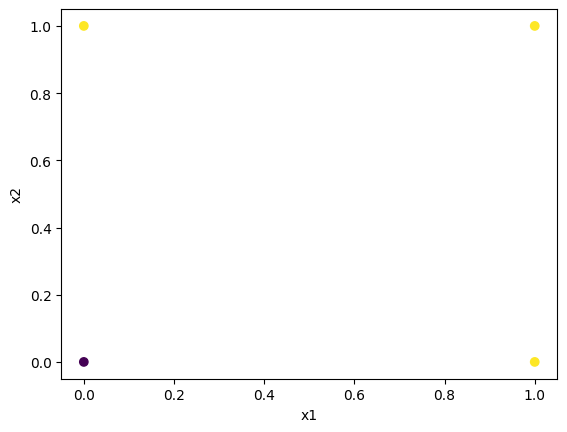

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 4. 모형화 및 학습

In [7]:
model=Perceptron(verbose=1)
model.fit(X,y)

-- Epoch 1
Norm: 1.41, NNZs: 2, Bias: 0.000000, T: 4, Avg. loss: 0.250000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.24, NNZs: 2, Bias: 0.000000, T: 8, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.24, NNZs: 2, Bias: -1.000000, T: 12, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.83, NNZs: 2, Bias: 0.000000, T: 16, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.83, NNZs: 2, Bias: -1.000000, T: 20, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.83, NNZs: 2, Bias: -1.000000, T: 24, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.83, NNZs: 2, Bias: -1.000000, T: 28, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(verbose=1)

- 학습계수 eta0=1

- 학습 종료 기준 허용오차 0.001

- 이전 단계 epoch의 평균 비용과 현재 epoch의 평균 비용과의 차이가 허용오차보다 작으면 학습 종료ㅡ

In [9]:
# 가중치
print(model.coef_)
# 편향
print(model.intercept_)
# 학습 수(epoch)
print(model.n_iter_)

[[2. 2.]]
[-1.]
7


$$x_2=\dfrac{w_1}{w_2}x_1 - \dfrac{b}{w_2}$$

$$x_2=-\dfrac{2}{2}x_1 - \dfrac{-1}{2}= -x_1+\dfrac{1}{2}$$

/home/coco/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


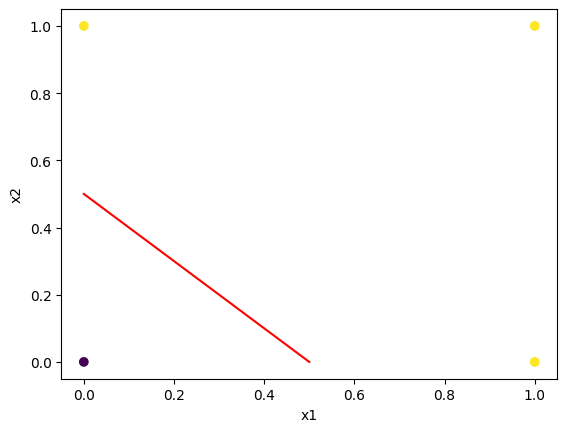

In [10]:
#산포도
plt.scatter(X[:,0], X[:,1],c=y)
plt.xlabel('x1')
plt.ylabel('x2')

#파라미터
w1=model.coef_[0,0]
w2=model.coef_[0,1]
b=model.intercept_

#x절편
x_intercept=-b/w1
#y절편
y_intercept=-b/w2
#선형 분류자 추가
plt.plot([0,y_intercept],[x_intercept,0], c='red')
plt.show()

## 5. 예측

In [11]:
X_test=X
pred=model.predict(X_test)
print(pred)

[0 1 1 1]


# 붗꽃 분류

- 4개의 입력 노드와 1개의 출력 노드로 구성

## 1. 패키지 설정

In [12]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. 데이터 준비

In [13]:
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [14]:
X=iris.data
y=iris.target
print(X[:10])
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 3. 탐색적 데이터 분석

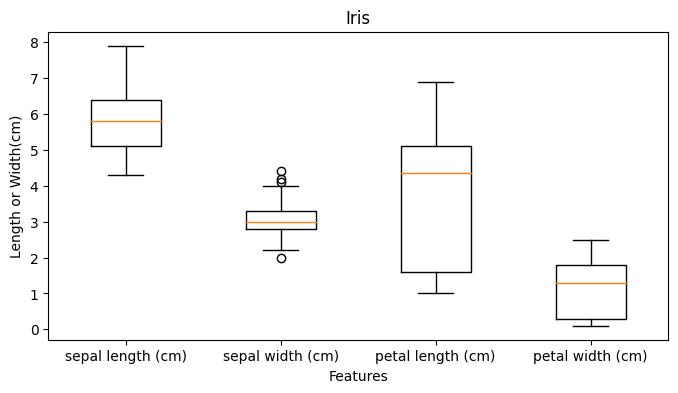

In [17]:
plt.figure(figsize=(8,4))
plt.boxplot([X[:,0],X[:,1],X[:,2],X[:,3]],
            labels=iris.feature_names)
plt.title('Iris')
plt.xlabel('Features')
plt.ylabel('Length or Width(cm)')
plt.show()

In [18]:
X_df=pd.DataFrame(X)  #boxplot()함수 사용을 위해 데이터 프레임 변환

X_df.columns=iris.feature_names # 특성 이름 열 이름으로 대체

X_df['species']=y

print(X_df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

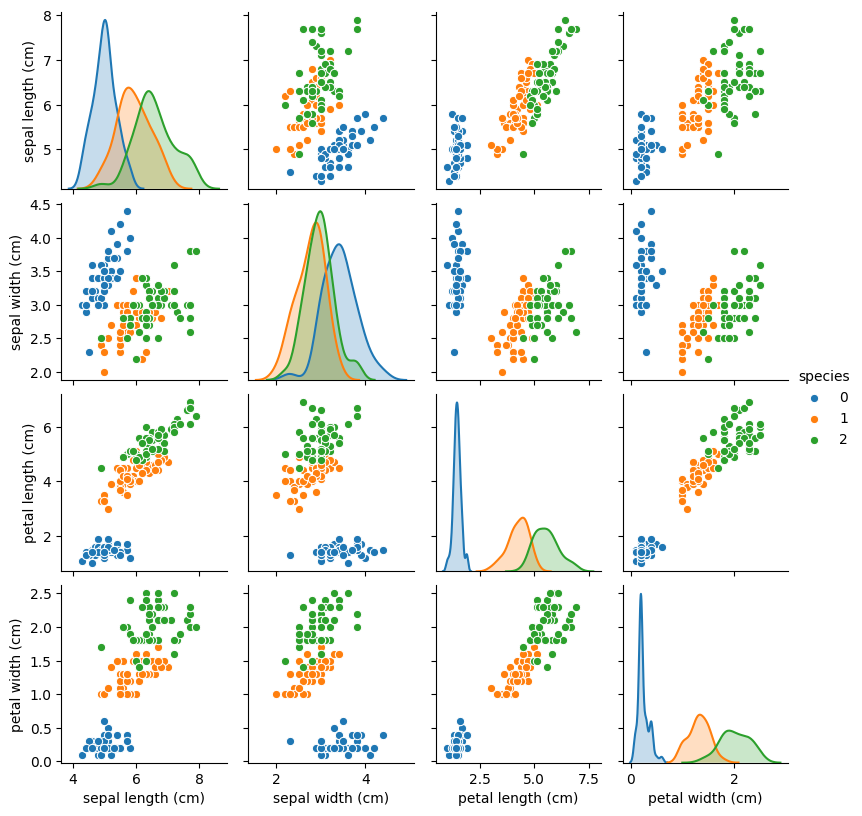

In [20]:
sns.pairplot(X_df, hue='species', height=2)

## 4. 데이터 분리

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## 5. 피처 스케일링

In [22]:
scalerX=StandardScaler()
scalerX.fit(X_train)
X_train_std=scalerX.transform(X_train)
X_test_std=scalerX.transform(X_test)

## 6. 모형화 및 학습

In [23]:
model=Perceptron(verbose=1)
model.fit(X_train_std,y_train)

-- Epoch 1
Norm: 3.02, NNZs: 4, Bias: 0.000000, T: 105, Avg. loss: 0.004369
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.02, NNZs: 4, Bias: 0.000000, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.02, NNZs: 4, Bias: 0.000000, T: 315, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.02, NNZs: 4, Bias: 0.000000, T: 420, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.02, NNZs: 4, Bias: 0.000000, T: 525, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.02, NNZs: 4, Bias: 0.000000, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.02, NNZs: 4, Bias: 0.000000, T: 735, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
-- Epoch 1
Norm: 1.85, NNZs: 4, Bias: -2.000000, T: 105, Avg. loss: 0.701329
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.98, NNZs: 4, Bias: 1.000000, T: 210, Avg. loss:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Perceptron(verbose=1)

In [24]:
# 가중치
print(model.coef_)
# 편향
print(model.intercept_)

[[-1.35951428  1.97275265 -1.46733157 -1.0997214 ]
 [-0.91929061 -1.69928112  4.06213278 -3.23501377]
 [-1.60316749 -0.19414391  5.45511955  5.44362091]]
[ 0. -2. -9.]


## 7. 예측

In [25]:
y_pred=model.predict(X_test_std)

In [26]:
print(y_pred) #예측값
print(y_test) #실제값

[1 0 2 2 0 0 2 2 0 1 0 2 0 1 2 1 1 2 0 0 0 2 0 0 1 0 2 2 0 0 2 0 0 0 0 0 2
 2 2 0 2 0 0 2 2]
[1 1 2 2 1 0 2 2 0 2 1 2 0 1 2 1 1 2 0 0 0 2 0 0 1 1 2 2 0 0 2 0 0 0 1 0 2
 2 2 0 2 0 1 2 2]


In [27]:
print('Accuracy:%.2f' % accuracy_score(y_test,y_pred))

Accuracy:0.84
